<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_metricaClasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,f1_score

df = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/bank_modified.csv')
df.head()


,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


**Encuentren los nombres de clase y determinen cómo están las clases balanceadas**

In [105]:
#df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})
df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

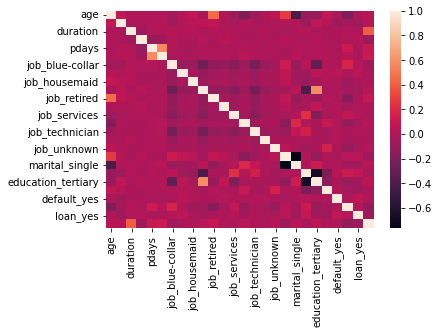

In [106]:
lista=list(df.columns)
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = False) 

**Visualizacion para la relación entre concave points_worst y diagnosis (objetivo)**

Text(0.5, 0, 'duration')

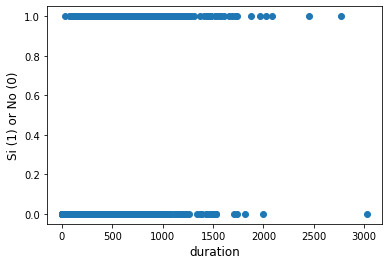

In [110]:
plt.scatter(df['duration'], df['y_yes'])
plt.ylabel('Si (1) or No (0)', fontsize = 12)
plt.xlabel('duration', fontsize = 12)


**Intento de regresión lineal para clasificar los datos**

**Separa X, y**

In [108]:
# Assign feature matrix and target vector
X = df[['duration']]
y = df['y_yes']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



Text(0.5, 0, 'duration')

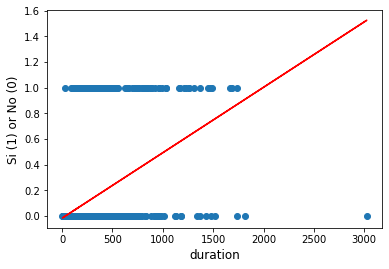

In [111]:
# Make a linear regression instance
lr = LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(X_train,y_train)
# Get Predictions
predictions = lr.predict(X_test)
# This code shows how to graph the results comparing the prediction with the actual value
plt.scatter(X_test['duration'], y_test)
plt.plot(X_test['duration'], predictions, color='red')
plt.ylabel('Si (1) or No (0)', fontsize = 12)
plt.xlabel('duration', fontsize = 12)



**De acuerdo con esto, cualquier valor de predicción (rojo) >= 0,5 (que corresponde al valor cerca de 1000 para duration), predecimos una clase 1 (suscripcion), sino predecimos una clase de 0 (no suscripcion).**

**Problema: Si el valor y_yes is 1,0, ¿qué significa cuando tenemos 1,20 para nuestra clase en lugar de 1 o 0? Parece extraño. Quizás deberíamos restringir nuestras predicciones entre 0 y 1. Eso se puede hacer usando la regresión logística.**

# Regresion Logistica

In [79]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

In [80]:
# This code is just to plot/visualize the predictions
example_df = pd.DataFrame(data = {'duration': X_test['duration'],
                     'y_yes': y_test})
example_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
example_df = example_df.sort_values(['logistic_preds'])


Text(0.5, 0, 'duration')

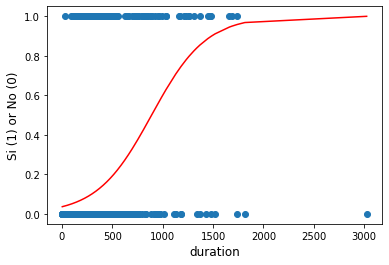

In [112]:
plt.scatter(X_test['duration'], y_test)
plt.plot(example_df['duration'], example_df['logistic_preds'].values, color='red')
plt.ylabel('Si (1) or No (0)', fontsize = 12)
plt.xlabel('duration', fontsize = 12)

In [116]:
y_pred = logreg.predict(X_test)

print('Exactitud de la regresión logística en los datos de prueba:\n',(accuracy_score(y_test,y_pred)))
print('\n')
print('Sensibilidad de la regresión logística en los datos de prueba:\n',(recall_score(y_test, y_pred)))
print('\n')
print('Especifidad de la regresión logística en los datos de prueba:\n',(f1_score(y_test, y_pred)))
print('\n')
print('La curva ROC de la regresión logística en los datos de prueba:\n',(roc_auc_score(y_test, y_pred)))
print('\n')


Exactitud de la regresión logística en los datos de prueba:
 0.8885941644562334


Sensibilidad de la regresión logística en los datos de prueba:
 0.168


Especifidad de la regresión logística en los datos de prueba:
 0.25


La curva ROC de la regresión logística en los datos de prueba:
 0.573065606361829




**R1 Creo que la exactitud es la mejor metrica, ya que se trata de una estimacion de probables clientes, por lo tanto, este indicador es el correcto**

**R2 en la comprativa se puede apreciar un modelo (referenci), bastante ambigiuo y con muchas consideraciones a tener en cuenta, ese creo es el mayor problema**